In [2]:
import numpy as np
from scipy.optimize import minimize
from sympy import *
init_printing(use_latex=true)

In [3]:
n, T, i, t, lda, eps = symbols('n T i t \lambda \epsilon')       # n wells & T timepoints
n = 3
T = 5

In [4]:
c = MatrixSymbol('c', n, T)      # Row 0 = well 0   , Column 3 = Timepoint 3
pprint(c.as_explicit())

⎡c₀₀  c₀₁  c₀₂  c₀₃  c₀₄⎤
⎢                       ⎥
⎢c₁₀  c₁₁  c₁₂  c₁₃  c₁₄⎥
⎢                       ⎥
⎣c₂₀  c₂₁  c₂₂  c₂₃  c₂₄⎦


In [5]:
d = MatrixSymbol('d', n, T)   
pprint(d.as_explicit())

⎡d₀₀  d₀₁  d₀₂  d₀₃  d₀₄⎤
⎢                       ⎥
⎢d₁₀  d₁₁  d₁₂  d₁₃  d₁₄⎥
⎢                       ⎥
⎣d₂₀  d₂₁  d₂₂  d₂₃  d₂₄⎦


In [6]:
p = MatrixSymbol('p', n, T)  
pprint(p.as_explicit())

⎡p₀₀  p₀₁  p₀₂  p₀₃  p₀₄⎤
⎢                       ⎥
⎢p₁₀  p₁₁  p₁₂  p₁₃  p₁₄⎥
⎢                       ⎥
⎣p₂₀  p₂₁  p₂₂  p₂₃  p₂₄⎦


In [7]:
w = MatrixSymbol('w', n, 1)
pprint(w.as_explicit())

⎡w₀₀⎤
⎢   ⎥
⎢w₁₀⎥
⎢   ⎥
⎣w₂₀⎦


In [8]:
P = MatrixSymbol('P', 1, T)
pprint(P.as_explicit())


[P₀₀  P₀₁  P₀₂  P₀₃  P₀₄]


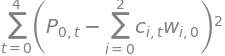

In [9]:
S1 = Sum((P[0,t] - Sum(c[i, t]*w[i,0], (i, 0, n-1)))**2 , (t, 0, T-1))
S1

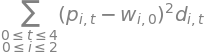

In [10]:
S2 = Sum(Sum(d[i,t]*((p[i,t]-w[i, 0]))**2 , (t, 0, T-1)), (i, 0, n-1))
S2

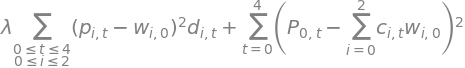

In [11]:
I = S1 + lda*S2
I

In [17]:
I2 = I.subs({P: Matrix([[3, 3, 3, 8, 8]]), c: Matrix([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 1, 1]])})
I3 = I2.subs({d: Matrix([[0, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0]])})
Inaccuracy = I3.subs({p: Matrix([[1, 1, 1, 1, 1],  [2, 2, 2, 2, 2], [0, 0, 0, 5, 5]])})
Inaccuracy

                                                                              
                                                                              
                                                                              
                                                                              
          2     4                                                             
        _____ _____                                                           
        ╲     ╲                                                               
         ╲     ╲                                         2                    
          ╲     ╲   ⎛⎛⎡1  1  1  1  1⎤⎞                  ⎞  ⎛⎡0  0  0  0  0⎤⎞  
           ╲     ╲  ⎜⎜⎢             ⎥⎟                  ⎟  ⎜⎢             ⎥⎟  
\lambda⋅   ╱     ╱  ⎜⎜⎢2  2  2  2  2⎥⎟[i, t] - (w)[i, 0]⎟ ⋅⎜⎢0  1  0  0  0⎥⎟[i
          ╱     ╱   ⎜⎜⎢             ⎥⎟                  ⎟  ⎜⎢             ⎥⎟  
         ╱     ╱    ⎝⎝⎣0  0  0  5  5⎦⎠              

In [18]:
# Testing with true result
wEval = Matrix([1, 2, 5])
regHP = 0.2

solve(Inaccuracy.subs({w: wEval, lda: regHP})-eps, eps)

In [19]:
def inac(wTest, *args):
    regHP = args[0]
    Inaccuracy = args[1]
    wEval = Matrix(wTest)
    val = solve(Inaccuracy.subs({w: wEval, lda: regHP})-eps, eps)[0]
    return(val)

In [20]:
w0 = [1, 2, 3]
regHP = 2
args = (regHP, Inaccuracy)
minimize(inac, w0, args=args, method='Nelder-Mead', tol=0.1, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.064216
         Iterations: 22
         Function evaluations: 40


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.06421585076764084
             x: [ 7.836e-01  2.153e+00  5.050e+00]
           nit: 22
          nfev: 40
 final_simplex: (array([[ 7.836e-01,  2.153e+00,  5.050e+00],
                       [ 8.015e-01,  2.166e+00,  4.969e+00],
                       [ 7.798e-01,  2.170e+00,  5.007e+00],
                       [ 7.744e-01,  2.126e+00,  5.022e+00]]), array([ 6.422e-02,  6.833e-02,  6.919e-02,  7.469e-02]))

In [160]:
inac([1, 2, 3], 0.5, Inaccuracy)